In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

In [2]:
def RossModified(initial_conditions, params, t):

    # Bring in the initial conditions
    I0, Im0, Ihv0, Shv0, S0 = initial_conditions
    # Initialize solution lists/vectors
    I, Im, Ihv, Shv, S = [I0], [Im0], [Ihv0], [Shv0], [S0]
    # Bring in parameters
    a, b, c, m, r, u2, VE= params
    # Learn the timestep from the time vector
    dt = t[1] - t[0]
    
    # Euler
    for _ in t[1:]:
        Iht = I[-1] + (a*b*m*Im[-1]*S[-1]-r*I[-1])* dt
        Sht = S[-1] + (-a*b*m*Im[-1]*S[-1]+r*I[-1]) * dt
        
        Ihvt = Ihv[-1] + (a*b*(1-VE)*m*Im[-1]*Shv[-1]-r*Ihv[-1])* dt
        Shvt = Shv[-1] + (-a*b*(1-VE)*m*Im[-1]*Shv[-1]+r*Ihv[-1]) * dt     
        
        Imt = Im[-1]+ (a*c*I[-1]*(1-Im[-1])-u2*Im[-1])* dt

        I.append(Iht)
        S.append(Sht)
        Ihv.append(Ihvt)
        Shv.append(Shvt)
        Im.append(Imt)
    # Return the results
    return I, Im, Ihv, S, Shv

In [41]:
# Population size
N=1002

# ONE YEAR of timesteps in days
t_max = 60
dt = 0.0001
t = np.linspace(0, t_max, int(t_max/dt) + 1)

# SIR Parameters

a = 0.2 # Man biting rate [0.01-0.5 per day]
b = 0.3 # proportion of bites that result in an infection [0.2-0.5]
c = 0.5 # proportion of bites that result in an infected mosqito (0.5)
m = 15 # ratio of mosqitos to humans  [0.5-40]
r = 0.01 # average recovery rate of humans [0.005-0.05 per day]
u2 = 0.3 # per capita rate of mosqito mortality [0.05-0.5 per day]
VE = 0.39 # vaccine effectiveness 


params = a, b, c, m, r, u2, VE

# Initial Conditions
I0=1
S0 = 600
Im0=1/N
Shv0 = 400
Ihv0=1

# Run the simulation
results = RossModified((I0,Im0, Ihv0, Shv0, S0), params, t)

I,Im, Ihv, Shv, S = results

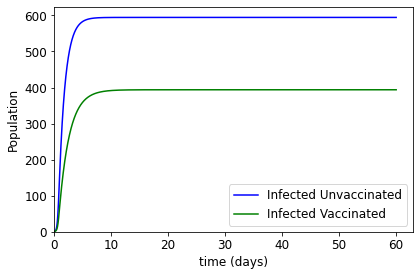

In [42]:
colors = {
    'I':'b',
    'Ihv':'g'}

# Set up the axes
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(t,I,label='Infected Unvaccinated',color=colors['I'])
ax.plot(t,Ihv,label='Infected Vaccinated',color=colors['Ihv'])

# Make the plot attractive
ax.legend(loc='best')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('time (days)')
ax.set_ylabel('Population')

plt.tight_layout()

# Uncomment this line to save your figure as a PNG.
# plt.savefig('figure_name_here.png',dpi=150)

# R0 Equations: Different Vaccine Efficacies

In [7]:
# Define some variables first
Tm = 5 #[5-15 days]
u1 = 0.017/365 # 0.017/365 to get per day because it is 0.017 per year
Th = 20 #[10-100 day]

In [8]:
VE = 1 # 100% effective vaccine
rValue2=((m*(a**2)*b*(1-VE)*c)/(r*u2))*(math.e**(-u2*Tm))*(math.e**(-u1*Th)) # multiplying b*(1-VE)
rValue2 =np.round(rValue2, decimals = 2)
print(rValue2)

0.0


In [9]:
VE = 0.8 # 80% effective
rValue2=((m*(a**2)*b*(1-VE)*c)/(r*u2))*(math.e**(-u2*Tm))*(math.e**(-u1*Th)) # multiplying b*(1-VE)
rValue2 =np.round(rValue2, decimals = 2)
print(rValue2)

1.78


In [10]:
VE = 0.6 # 60% effective
rValue2=((m*(a**2)*b*(1-VE)*c)/(r*u2))*(math.e**(-u2*Tm))*(math.e**(-u1*Th)) # multiplying b*(1-VE)
rValue2 =np.round(rValue2, decimals = 2)
print(rValue2)

3.57


In [11]:
VE = 0.39 # 39% effective --> actual effectiveness of RTS,S
rValue2=((m*(a**2)*b*(1-VE)*c)/(r*u2))*(math.e**(-u2*Tm))*(math.e**(-u1*Th)) # multiplying b*(1-VE)
rValue2 =np.round(rValue2, decimals = 2)
print(rValue2)

5.44


# R0 Equations: Different Models

In [12]:
a = 0.2 # Man biting rate [0.01-0.5 per day]
b = 0.3 # proportion of bites that result in an infection [0.2-0.5]
c = 0.5 # proportion of bites that result in an infected mosqito (0.5)
m = 20 # ratio of mosqitos to humans  [0.5-40]
r = 0.01 # average recovery rate of humans [0.005-0.05 per day]
u2 = 0.3 # per capita rate of mosqito mortality [0.05-0.5 per day]
VE = 0.39 # vaccine effectiveness 

In [13]:
# R0 Unvaccinated --> Ross Model
rValue1=(m*(a**2)*b*c)/(r*u2)
rValue1 =np.round(rValue1, decimals = 2)
print(rValue1)

40.0


In [14]:
# R0 Unvaccinated --> Macdonald
Tm = 5 #[5-15 days]
rValue1=((m*(a**2)*b*c)/(r*u2))*(math.e**(-u2*Tm))
rValue1 =np.round(rValue1, decimals = 2)
print(rValue1)

8.93


In [15]:
# R0 Unvaccinated --> Anderson and May Model
Tm = 5 #[5-15 days]
u1 = 0.017/365 # 0.017/365 to get per day because it is 0.017 per year
Th = 20 #[10-100 day]
rValue1=((m*(a**2)*b*c)/(r*u2))*(math.e**(-u2*Tm))*(math.e**(-u1*Th))
rValue1 =np.round(rValue1, decimals = 2)
print(rValue1)

8.92
